<a href="https://colab.research.google.com/github/kuds/rl-lunar-lander/blob/main/%5BLunar%20Lander%5D%20Soft%20Actor-Critic%20(SAC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Soft Actor-Critic (SAC)
---
In this notebook, you will implement a SAC agent with Gymansium's LunarLander-v3 environment.

In [1]:
!pip install swig

In [2]:
!pip install stable_baselines3 gymnasium[box2d]

In [3]:
import gymnasium
import stable_baselines3
from stable_baselines3 import SAC
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.vec_env import VecFrameStack, VecTransposeImage
from stable_baselines3.common.vec_env import VecVideoRecorder

import os
import torch
import numpy
import scipy
import platform
import IPython
import matplotlib
import matplotlib.pyplot
from importlib.metadata import version

In [4]:
print(f"Python Version: {platform.python_version()}")
print(f"Torch Version: {version('torch')}")
print(f"Is Cuda Available: {torch.cuda.is_available()}")
print(f"Cuda Version: {torch.version.cuda}")
print(f"Gymnasium Version: {version('gymnasium')}")
print(f"Numpy Version: {version('numpy')}")
print(f"Scipy Version: {version('scipy')}")
print(f"Swig Version: {version('swig')}")
print(f"Stable Baselines3 Version: {version('stable_baselines3')}")
print(f"IPython Version: {version('ipython')}")

Python Version: 3.11.12
Torch Version: 2.6.0+cu124
Is Cuda Available: True
Cuda Version: 12.4
Gymnasium Version: 1.1.1
Numpy Version: 2.0.2
Scipy Version: 1.15.3
Swig Version: 4.3.1
Stable Baselines3 Version: 2.6.0
IPython Version: 7.34.0


In [5]:
rl_type = "SAC"
env_str = "LunarLanderContinuous-v3"
log_dir = "./logs/{}".format(env_str)
name_prefix = "lunar_lander_continuous"

In [6]:
env = gymnasium.make(env_str)
print("Observation Space Size: ", env.observation_space.shape)
print("Action Space Size: ", env.action_space.shape)
env.close()

Observation Space Size:  (8,)
Action Space Size:  (2,)


<frozen importlib._bootstrap>:241: DeprecationWarning: builtin type SwigPyPacked has no __module__ attribute
<frozen importlib._bootstrap>:241: DeprecationWarning: builtin type SwigPyObject has no __module__ attribute
<frozen importlib._bootstrap>:241: DeprecationWarning: builtin type swigvarlink has no __module__ attribute


In [7]:
#Create Training Environment
env = make_vec_env(env_str, n_envs=1)

#Create Evaluation Environment
env_val = make_vec_env(env_str, n_envs=1)

eval_callback = EvalCallback(env_val,
                             best_model_save_path=log_dir,
                             log_path=log_dir,
                             eval_freq=25_000,
                             render=False,
                             n_eval_episodes=20)

# Initialize SAC
model = SAC('MlpPolicy', env, verbose=0)

# Train the model
model.learn(total_timesteps=500_000,
            progress_bar=True,
            callback=eval_callback)

# Save the model
model.save(os.path.join(log_dir, "final_model"))

# Evaluate the model
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=20)
print(f"Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

env.close()
env_val.close()

Output()

/usr/local/lib/python3.11/dist-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

Eval num_timesteps=25000, episode_reward=-131.11 +/- 74.73

Episode length: 630.65 +/- 223.02

New best mean reward!

Eval num_timesteps=50000, episode_reward=-91.14 +/- 41.76

Episode length: 821.35 +/- 286.90

New best mean reward!

Eval num_timesteps=75000, episode_reward=77.16 +/- 157.49

Episode length: 395.50 +/- 243.38

New best mean reward!

Eval num_timesteps=100000, episode_reward=-7.40 +/- 69.40

Episode length: 849.25 +/- 302.79

Eval num_timesteps=125000, episode_reward=10.63 +/- 98.66

Episode length: 959.15 +/- 78.16

Eval num_timesteps=150000, episode_reward=142.38 +/- 95.87

Episode length: 584.85 +/- 196.62

New best mean reward!

Eval num_timesteps=175000, episode_reward=220.33 +/- 65.87

Episode length: 345.15 +/- 173.11

New best mean reward!

Eval num_timesteps=200000, episode_reward=254.63 +/- 22.00

Episode length: 405.85 +/- 84.51

New best mean reward!

Eval num_timesteps=225000, episode_reward=224.51 +/- 79.68

Episode length: 362.40 +/- 228.73

Eval num_timesteps=250000, episode_reward=234.65 +/- 72.49

Episode length: 339.35 +/- 201.53

Eval num_timesteps=275000, episode_reward=263.11 +/- 22.37

Episode length: 272.15 +/- 32.35

New best mean reward!

Eval num_timesteps=300000, episode_reward=224.15 +/- 115.74

Episode length: 268.85 +/- 104.16

Eval num_timesteps=325000, episode_reward=242.28 +/- 69.90

Episode length: 324.75 +/- 229.07

Eval num_timesteps=350000, episode_reward=242.48 +/- 83.33

Episode length: 209.70 +/- 62.48

Eval num_timesteps=375000, episode_reward=263.25 +/- 46.93

Episode length: 278.30 +/- 168.28

New best mean reward!

Eval num_timesteps=400000, episode_reward=275.28 +/- 19.81

Episode length: 240.40 +/- 38.26

New best mean reward!

Eval num_timesteps=425000, episode_reward=276.92 +/- 17.00

New best mean reward!

Eval num_timesteps=450000, episode_reward=281.94 +/- 16.44

Episode length: 236.25 +/- 27.71

New best mean reward!

Eval num_timesteps=475000, episode_reward=283.16 +/- 19.07

Episode length: 208.85 +/- 23.60

New best mean reward!

Eval num_timesteps=500000, episode_reward=277.97 +/- 18.17

Episode length: 197.75 +/- 12.22

Mean reward: 278.23 +/- 17.35


In [9]:
# Load the best model
env = make_vec_env(env_str, n_envs=1, seed=0)
best_model_path = os.path.join(log_dir, "best_model.zip")
best_model = SAC.load(best_model_path, env=env)

mean_reward, std_reward = evaluate_policy(best_model, env, n_eval_episodes=20)
print(f"Best Model - Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

# Record video of the best model playing Lunar Lander
best_model_file_name = "best_model_{}".format(name_prefix)
env = VecVideoRecorder(env,
                       log_dir,
                       video_length=5000,
                       record_video_trigger=lambda x: x == 0,
                       name_prefix=best_model_file_name)

obs = env.reset()
for _ in range(5000):
    action, _states = best_model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()
    if dones:
        break

env.close()

Best Model - Mean reward: 277.86 +/- 19.46


/usr/local/lib/python3.11/dist-packages/moviepy/config_defaults.py:1: DeprecationWarning: invalid escape sequence '\P'
  """


Moviepy - Building video /content/logs/LunarLanderContinuous-v3/best_model_lunar_lander_continuous-step-0-to-step-5000.mp4.
Moviepy - Writing video /content/logs/LunarLanderContinuous-v3/best_model_lunar_lander_continuous-step-0-to-step-5000.mp4



Moviepy - Done !
Moviepy - video ready /content/logs/LunarLanderContinuous-v3/best_model_lunar_lander_continuous-step-0-to-step-5000.mp4


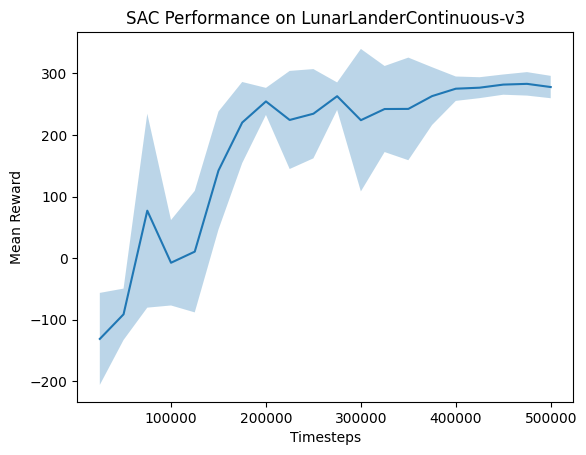

In [10]:
# Load the evaluations.npz file
data = numpy.load(os.path.join(log_dir, "evaluations.npz"))

# Extract the relevant data
timesteps = data["timesteps"]
results = data["results"]

# Calculate the mean and standard deviation of the results
mean_results = numpy.mean(results, axis=1)
std_results = numpy.std(results, axis=1)

# Plot the results
matplotlib.pyplot.figure()
matplotlib.pyplot.plot(timesteps, mean_results)
matplotlib.pyplot.fill_between(timesteps,
                               mean_results - std_results,
                               mean_results + std_results,
                               alpha=0.3)

matplotlib.pyplot.xlabel("Timesteps")
matplotlib.pyplot.ylabel("Mean Reward")
matplotlib.pyplot.title(f"{rl_type} Performance on {env_str}")
matplotlib.pyplot.show()